In [14]:
import pandas as pd
import psycopg2
import numpy as np
import sql as gd
import sqlalchemy as sqla
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sql import engine, get_data

In [15]:
population_genehmigung = get_data('SELECT * FROM population_genehmigung_merged_2008_2021')
population_genehmigung

/opt/homebrew/Caskroom/miniconda/base/envs/sql-practice/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,year,bundesland,age_avg,total_population,Gebäude/Baumaßnahmen_Anzahl_Wohngebäude,Wohnfläche_der_Wohnungen_1000_qm_Wohngebäude,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR_Wohngebäude,Gebäude/Baumaßnahmen_Anzahl_Nichtwohngebäude,Wohnfläche_der_Wohnungen_1000_qm_Nichtwohngebäude,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR_Nichtwohngebäude
0,2008,Baden-Württemberg,41.719779,10749506,20181,3110,4362991,8118,95,5523149
1,2008,Bayern,41.929931,12519728,25024,4084,6222185,12023,46,6726975
2,2008,Berlin,42.153147,3431675,2892,764,865135,424,1,1101512
3,2008,Brandenburg,44.414482,2522493,5978,783,911027,1295,7,1167952
4,2008,Bremen,43.165608,661866,705,110,115230,239,1,313311
...,...,...,...,...,...,...,...,...,...,...
219,2021,Saarland,45.171254,981000,1846,277,542990,611,5,366620
220,2021,Sachsen,45.463331,4077000,8253,1425,2690891,2523,25,1863442
221,2021,Sachsen-Anhalt,46.907331,2169000,4494,662,1117360,917,11,892178
222,2021,Schleswig-Holstein,44.744433,2919000,9764,1586,2957941,1615,23,1563416


In [16]:
population_genehmigung.corr()

,year,age_avg,total_population,Gebäude/Baumaßnahmen_Anzahl_Wohngebäude,Wohnfläche_der_Wohnungen_1000_qm_Wohngebäude,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR_Wohngebäude,Gebäude/Baumaßnahmen_Anzahl_Nichtwohngebäude,Wohnfläche_der_Wohnungen_1000_qm_Nichtwohngebäude,Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR_Nichtwohngebäude
year,1.000000,0.218897,0.009846,0.108363,0.189413,0.273606,-0.028331,0.197740,0.161922
age_avg,0.218897,1.000000,-0.377272,-0.317145,-0.369850,-0.341942,-0.329775,-0.350705,-0.371877
total_population,0.009846,-0.377272,1.000000,0.924100,0.913894,0.824040,0.825063,0.799463,0.811153
Gebäude/Baumaßnahmen_Anzahl_Wohngebäude,0.108363,-0.317145,0.924100,1.000000,0.985429,0.943937,0.937827,0.895449,0.923513
Wohnfläche_der_Wohnungen_1000_qm_Wohngebäude,0.189413,-0.369850,0.913894,0.985429,1.000000,0.972988,0.906268,0.913977,0.940320
Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR_Wohngebäude,0.273606,-0.341942,0.824040,0.943937,0.972988,1.000000,0.876644,0.933826,0.966447
Gebäude/Baumaßnahmen_Anzahl_Nichtwohngebäude,-0.028331,-0.329775,0.825063,0.937827,0.906268,0.876644,1.000000,0.843522,0.922896
Wohnfläche_der_Wohnungen_1000_qm_Nichtwohngebäude,0.197740,-0.350705,0.799463,0.895449,0.913977,0.933826,0.843522,1.000000,0.935580
Veranschlagte_Kosten_des_Bauwerks_Tsd._EUR_Nichtwohngebäude,0.161922,-0.371877,0.811153,0.923513,0.940320,0.966447,0.922896,0.935580,1.000000


<AxesSubplot:xlabel='total_population', ylabel='Gebäude/Baumaßnahmen_Anzahl_Wohngebäude'>

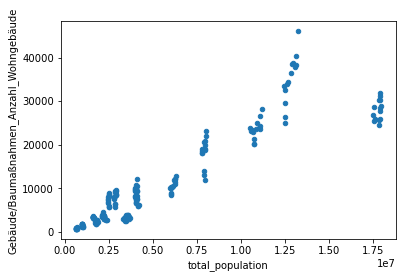

In [17]:
population_genehmigung.plot(kind='scatter', x='total_population', y='Gebäude/Baumaßnahmen_Anzahl_Wohngebäude')

In [18]:
y = population_genehmigung[['Gebäude/Baumaßnahmen_Anzahl_Wohngebäude']]
X = population_genehmigung.total_population
X = sm.add_constant(X)
model = sm.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Gebäude/Baumaßnahmen_Anzahl_Wohngebäude   R-squared:                       0.854
Model:                                                 OLS   Adj. R-squared:                  0.853
Method:                                      Least Squares   F-statistic:                     1298.
Date:                                     Wed, 01 Jun 2022   Prob (F-statistic):           1.04e-94
Time:                                             14:10:55   Log-Likelihood:                -2170.1
No. Observations:                                      224   AIC:                             4344.
Df Residuals:                                          222   BIC:                             4351.
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              172.3509    386.841      0.446      0.656    -589.999     934.700
total_population     0.0020   5.55e-05     36.030      0.000       0.002       0.002
==============================================================================
Omnibus:                       58.286   Durbin-Watson:                   2.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.587
Skew:                           0.994   Prob(JB):                     2.81e-49
Kurtosis:                       7.472   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
intercept, slope = results.params

print(f'intercept: {intercept}, slope: {slope}')

intercept: 172.35093088173016, slope: 0.0020005304842871073


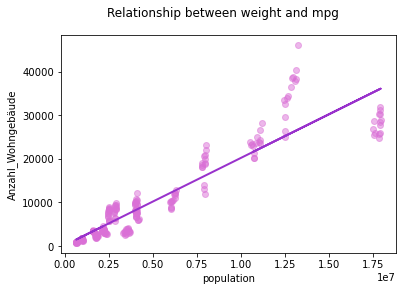

In [22]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(6, 4))

y = population_genehmigung[['Gebäude/Baumaßnahmen_Anzahl_Wohngebäude']]
x = population_genehmigung.total_population

# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between weight and mpg')

# plotting the regression line with the help of our calculated intercept and slope variables
ax.plot(x, x*slope+intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("Anzahl_Wohngebäude");
ax.set_xlabel("population");

In [25]:
results.predict([1,2e7])

array([40182.96061662])